<a href="https://colab.research.google.com/github/aditikutwal/Internship/blob/main/Medical_Cost_Personal_Insurance_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
link = 'https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv'
df = pd.read_csv(link)

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [10]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [11]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

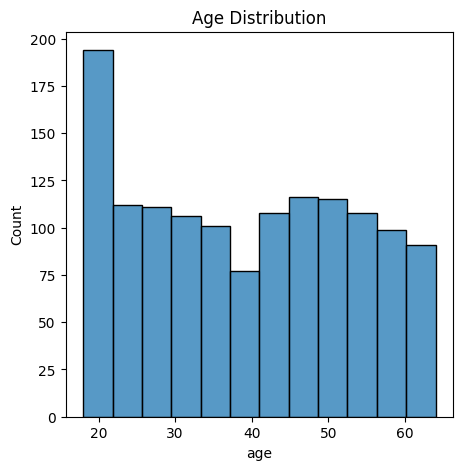

In [20]:
plt.figure(figsize=(5,5))
sns.histplot(df['age'])
plt.title('Age Distribution')
plt.show()

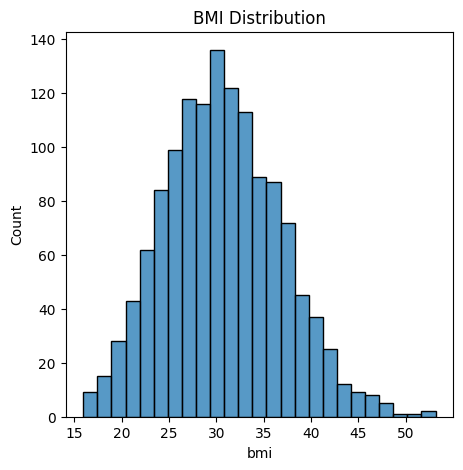

In [21]:
plt.figure(figsize=(5,5))
sns.histplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()                                         #more BMI, more cost

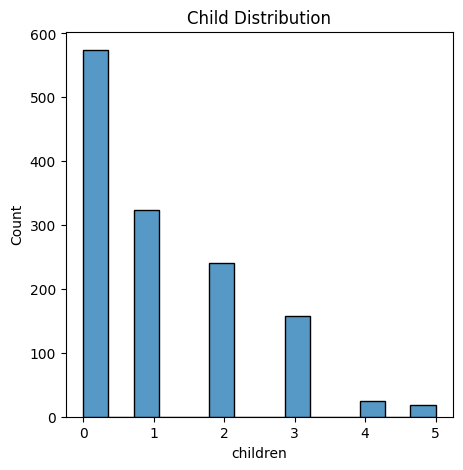

In [22]:
plt.figure(figsize=(5,5))
sns.histplot(df['children'])
plt.title('Child Distribution')
plt.show()

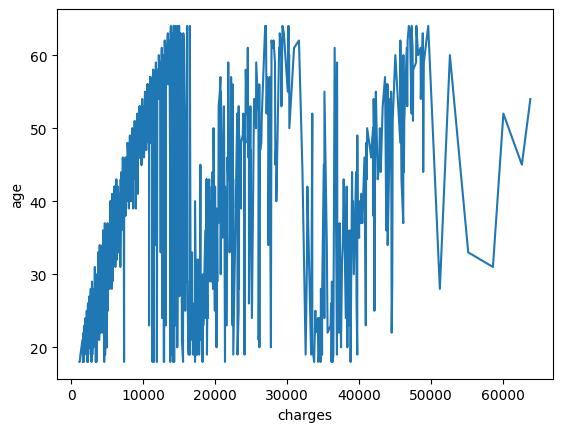

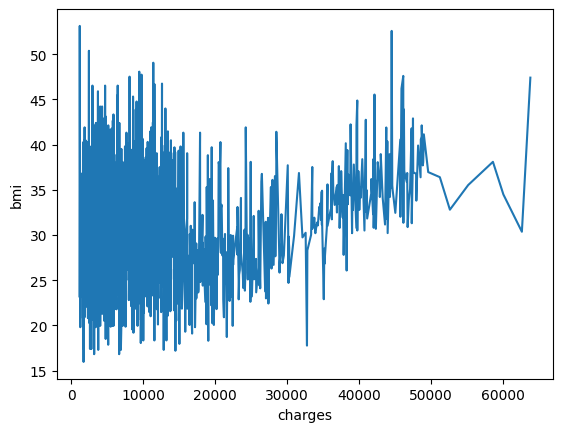

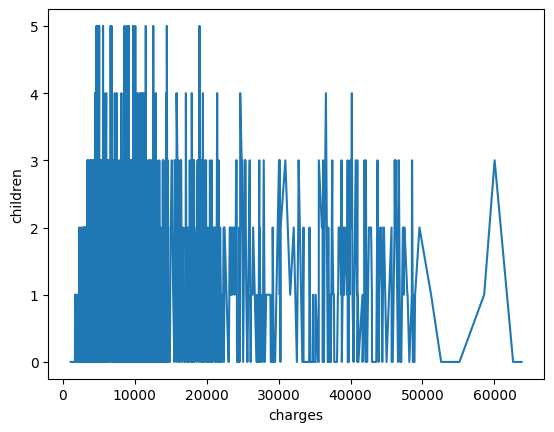

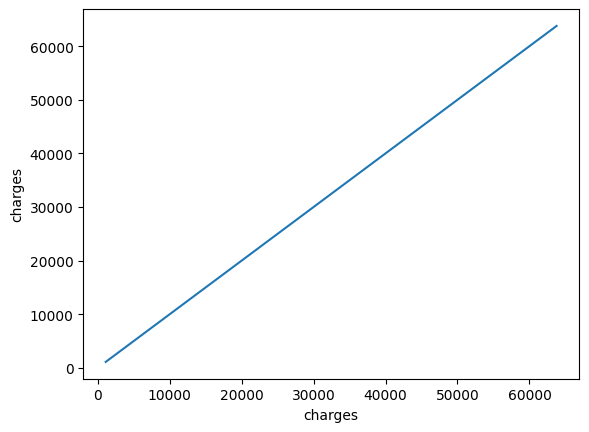

In [14]:
df1 = df.select_dtypes([np.int64, np.float64])


for i, col in enumerate(df1.columns):
    plt.figure(i)
    sns.lineplot(x='charges', y =col, data=df1)

In [32]:
df.replace({'sex':{'male':0,'female':1}}, inplace=True)

df.replace({'smoker':{'yes':1,'no':0}}, inplace=True)

df.replace({'region':{'northeast':0,'northwest':1, 'southeast':2,'southwest':3}}, inplace=True)

In [33]:
X = df.drop(columns='charges', axis=1)
Y = df['charges']

In [34]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [44]:
regressor = LinearRegression()

In [45]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [50]:
training_data_prediction =regressor.predict(X_train)

In [57]:
regressor.score(X_train, Y_train)

0.751505643411174

In [58]:
test_data_prediction =regressor.predict(X_test)

In [54]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [49]:
rf_regressor.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [59]:
train_rf = rf_regressor.fit(X_train, Y_train)

In [61]:
rf_regressor.score(X_train, Y_train)

0.8350423589041063

In [62]:
test_rf = rf_regressor.fit(X_test, Y_test)

In [65]:
a = [[45,0,27.51,1,3,0]]

prediction = regressor.predict(a)
print(prediction)

[3760.0805765]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [66]:
a = [[45,0,27.51,1,3,0]]

prediction1 = rf_regressor.predict(a)
print(prediction1)

[4020.7103325]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Random Forest has higher score.